In [6]:
import geopandas as gpd
from shapely.geometry import LineString
import rasterio
import numpy as np
from rasterio.sample import sample_gen
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point



In [7]:

# шлях до твого файлу GeoParquet
gdf = gpd.read_parquet("geo_parqet_file/atl03x_1_2025-05-07_13_06_41_393.parquet_GEO.parquet")




In [5]:
print(gdf.crs)

{"$schema": "https://proj.org/schemas/v0.5/projjson.schema.json", "type": "GeographicCRS", "name": "WGS 84 longitude-latitude", "datum": {"type": "GeodeticReferenceFrame", "name": "World Geodetic System 1984", "ellipsoid": {"name": "WGS 84", "semi_major_axis": 6378137, "inverse_flattening": 298.257223563}}, "coordinate_system": {"subtype": "ellipsoidal", "axis": [{"name": "Geodetic longitude", "abbreviation": "Lon", "direction": "east", "unit": "degree"}, {"name": "Geodetic latitude", "abbreviation": "Lat", "direction": "north", "unit": "degree"}]}, "id": {"authority": "OGC", "code": "CRS84"}}


In [3]:

dem_path = "data_clipped/tandem/tan_dem_ellip.tif"

with rasterio.open(dem_path) as src:
    dem_crs = src.crs
    print("DEM CRS:", dem_crs)


DEM CRS: EPSG:4979


In [31]:

print("CRS:", gdf.crs)

# === 1. Шлях до geoid-моделі (наприклад, EGG2015.tif) ===
geoid_path = "/mnt/c/Users/5302/PycharmProjects/geoid/data/raw_data/egg_2015.tif"


# координати точок
coords = [(geom.x, geom.y) for geom in gdf.geometry]

# витяг значень з моделі квазігеоїда
with rasterio.open(geoid_path) as geoid_src:
    geoid_values = list(sample_gen(geoid_src, coords))

# додавання геоїдної та ортометричної висоти
gdf["geoid_height"] = [val[0] if val else np.nan for val in geoid_values]
gdf["orthometric_height"] = gdf["height"] - gdf["geoid_height"]


# === 5. Зберегти результат (наприклад, як GeoParquet або GeoPackage) ===
gdf.to_parquet("icesat2_region_orthometric.parquet")


CRS: {"$schema": "https://proj.org/schemas/v0.5/projjson.schema.json", "type": "GeographicCRS", "name": "WGS 84 longitude-latitude", "datum": {"type": "GeodeticReferenceFrame", "name": "World Geodetic System 1984", "ellipsoid": {"name": "WGS 84", "semi_major_axis": 6378137, "inverse_flattening": 298.257223563}}, "coordinate_system": {"subtype": "ellipsoidal", "axis": [{"name": "Geodetic longitude", "abbreviation": "Lon", "direction": "east", "unit": "degree"}, {"name": "Geodetic latitude", "abbreviation": "Lat", "direction": "north", "unit": "degree"}]}, "id": {"authority": "OGC", "code": "CRS84"}}


In [11]:
ice_gdf = gpd.read_parquet("icesat2_region_orthometric.parquet")

In [12]:
ice_gdf.head()

,region,gt,spacecraft_velocity,solar_elevation,rgt,ph_index,height,atl08_class,spot,x_atc,y_atc,cycle,atl03_cnf,background_rate,quality_ph,geometry,geoid_height,orthometric_height
time_ns,,,,,,,,,,,,,,,,,,
2019-03-03 19:21:21.423950592,6,50,7108.268555,-32.253899,998,123494,637.587952,3,5,1.472135e+07,-1802.341553,2,0,7597.688965,0,POINT (24.95269 48.05378),35.131,602.456952
2019-03-03 19:21:21.424350464,6,50,7108.268555,-32.253899,998,123497,615.246338,2,5,1.472135e+07,-1802.398560,2,3,7597.688965,0,POINT (24.95268 48.05376),35.131,580.115338
2019-03-03 19:21:21.424650752,6,50,7108.268555,-32.253899,998,123498,646.714050,3,5,1.472136e+07,-1802.335205,2,4,7597.688965,0,POINT (24.95268 48.05374),35.131,611.583050
2019-03-03 19:21:21.424750592,6,50,7108.268555,-32.253899,998,123499,650.420288,3,5,1.472136e+07,-1802.328979,2,4,7597.688965,0,POINT (24.95268 48.05373),35.131,615.289288
2019-03-03 19:21:21.425250560,6,50,7108.268555,-32.253899,998,123500,647.244324,2,5,1.472136e+07,-1802.346436,2,4,7597.688965,0,POINT (24.95267 48.0537),35.131,612.113324


In [15]:
ice_gdf = ice_gdf[ice_gdf["atl03_cnf"] == 4].copy()
print(f"Залишилось {len(ice_gdf)} точок")

Залишилось 453500 точок


In [2]:
dem_path = raster_path = "data_clipped/tandem/tan_dem_egg2015.tif"

with rasterio.open(dem_path) as src:
    print(src.crs.to_string() if src.crs else "None")



#     # 2. Отримуємо координати (довгота, широта)
#     coords = [(geom.x, geom.y) for geom in ice_gdf.geometry]
#
#     # 3. Витягуємо значення DEM
#     dem_values = list(sample_gen(src, coords))
#
# # 4. Додаємо висоти в таблицю вже ПОЗА блоком
# ice_gdf["dem_height"] = [val[0] if val else None for val in dem_values]

EPSG:4979


In [18]:
ice_gdf["dem_height"]

time_ns
2019-03-03 19:21:21.424650752    609.607239
2019-03-03 19:21:21.424750592    609.607239
2019-03-03 19:21:21.425250560    609.607239
2019-03-03 19:21:21.425750528    609.607239
2019-03-03 19:21:21.426050560    609.607239
                                    ...    
2021-05-29 04:19:30.535718144    934.515076
2021-05-29 04:19:30.535918336    934.515076
2021-05-29 04:19:30.536218368    934.515076
2021-05-29 04:19:30.536318208    934.515076
2021-05-29 04:19:30.536418560    934.515076
Name: dem_height, Length: 453500, dtype: float32

In [19]:
ice_gdf.index = pd.to_datetime(ice_gdf.index)


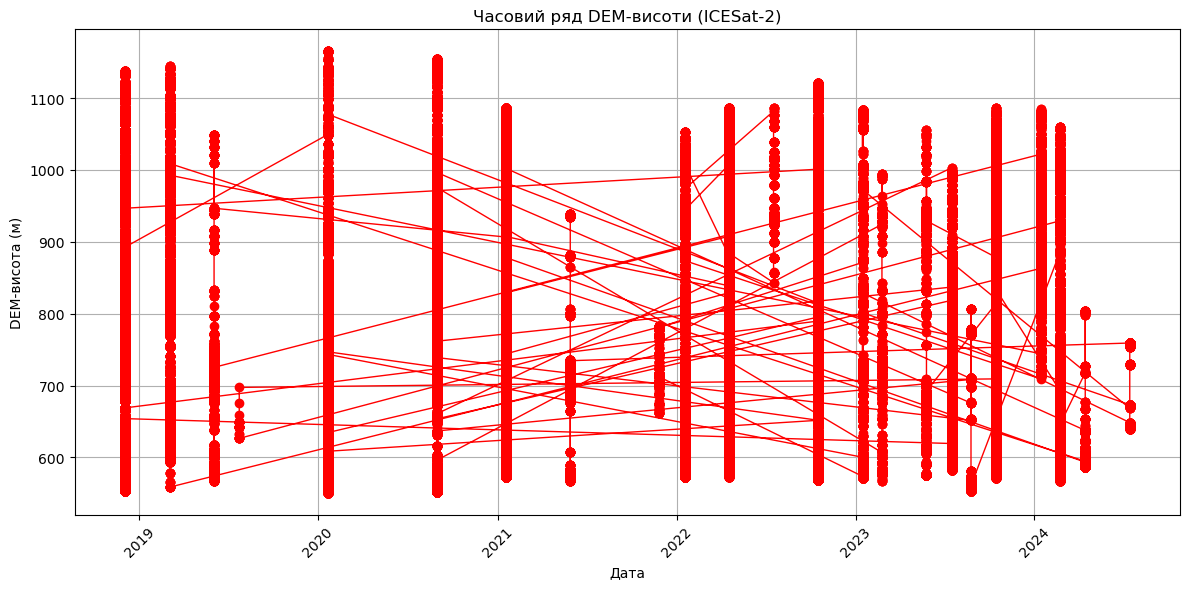

In [20]:

plt.figure(figsize=(12, 6))
plt.plot(ice_gdf.index, ice_gdf["dem_height"], marker="o", color="red", linewidth=1)

plt.title("Часовий ряд DEM-висоти (ICESat-2)")
plt.xlabel("Дата")
plt.ylabel("DEM-висота (м)")

plt.xticks(rotation=45)  # Повертає дати під кутом
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
print(ice_gdf["rgt"].unique())


[998 396]


In [23]:
track_396 = ice_gdf[ice_gdf["rgt"] == 396].copy()
track_998 = ice_gdf[ice_gdf["rgt"] == 998].copy()


In [25]:
# Подивимось унікальні значення в кожному RGT
for rgt_id in ice_gdf["rgt"].unique():
    subset = ice_gdf[ice_gdf["rgt"] == rgt_id]
    unique_gt = subset["gt"].unique()
    unique_spot = subset["spot"].unique()
    print(f"RGT {rgt_id}: {len(unique_gt)} gt -> {unique_gt}, spots: {unique_spot}")


RGT 998: 5 gt -> [50 60 40 30 10], spots: [5 6 2 1 4 3]
RGT 396: 6 gt -> [40 50 30 60 10 20], spots: [3 2 4 6 1 5]


In [26]:
track_396_s3 = ice_gdf[(ice_gdf["rgt"] == 396) & (ice_gdf["spot"] == 3)].copy()


In [27]:
track_396_s3 = track_396_s3.to_crs("EPSG:3857")  # або EPSG:3035 для Європи


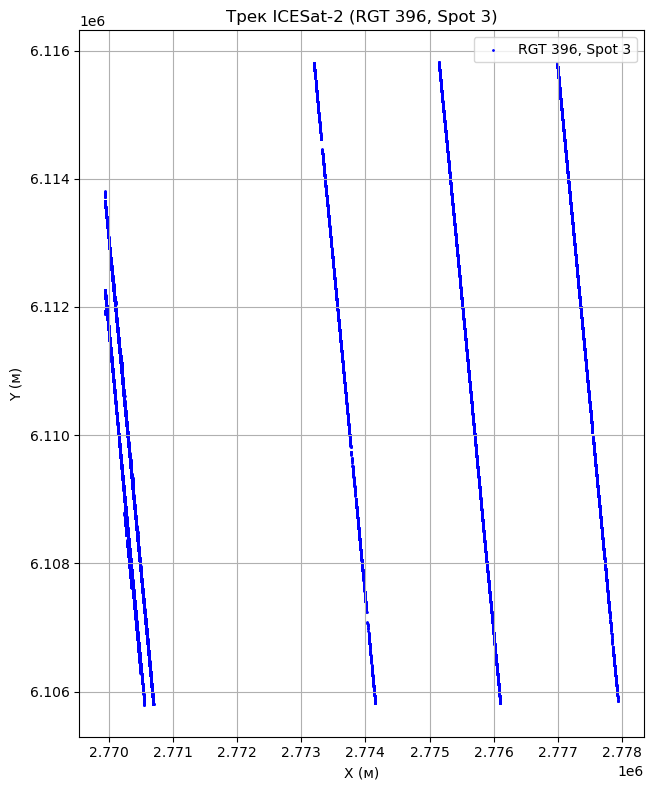

In [28]:

fig, ax = plt.subplots(figsize=(10, 8))
track_396_s3.plot(ax=ax, markersize=1, color="blue", label="RGT 396, Spot 3")

plt.title("Трек ICESat-2 (RGT 396, Spot 3)")
plt.xlabel("X (м)")
plt.ylabel("Y (м)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
track_396_s3["time"] = track_396_s3.index.floor("D")
unique_days = track_396_s3["time"].dt.date.unique()
print(f"Проходів: {len(unique_days)}")
print(sorted(unique_days))


Проходів: 10
[datetime.date(2020, 1, 21), datetime.date(2021, 1, 18), datetime.date(2022, 1, 17), datetime.date(2022, 4, 18), datetime.date(2022, 7, 17), datetime.date(2022, 10, 16), datetime.date(2023, 1, 15), datetime.date(2023, 7, 16), datetime.date(2023, 10, 14), datetime.date(2024, 1, 13)]


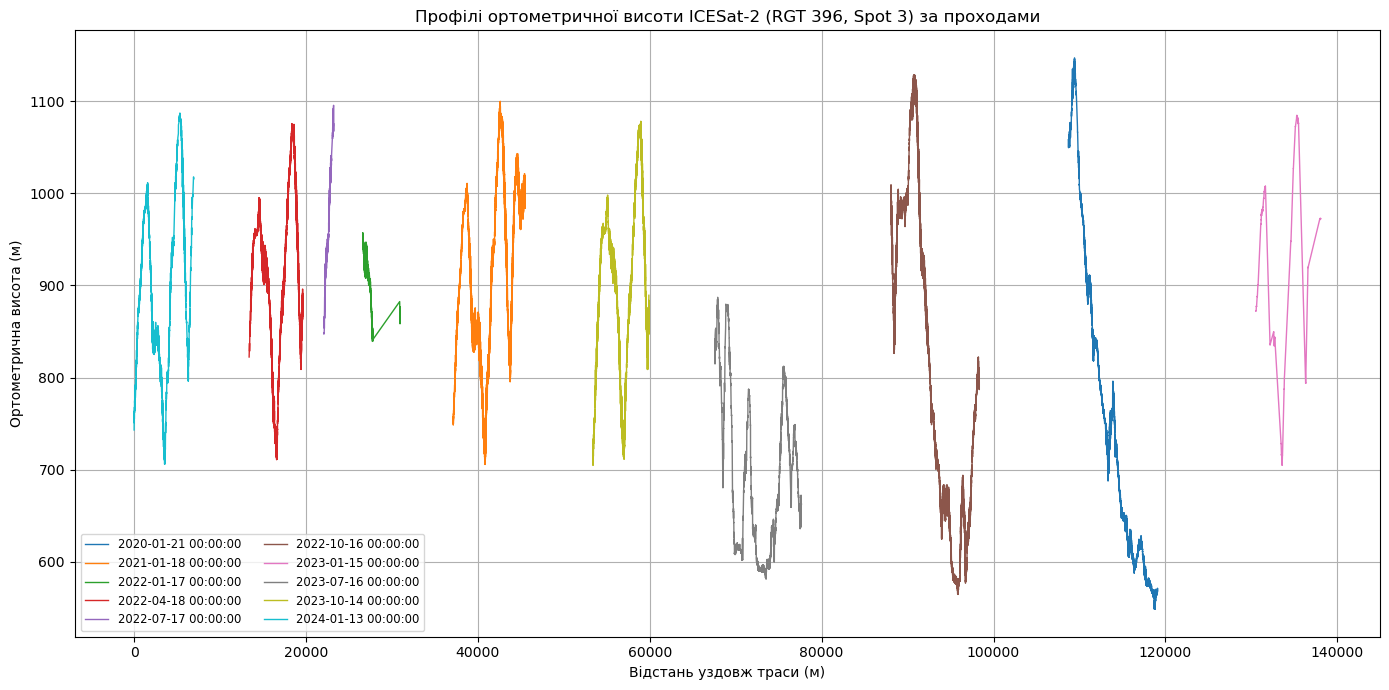

In [32]:

# Підготовка
track_396_s3["time"] = track_396_s3.index.floor("D")
line_geom = LineString(track_396_s3.geometry.tolist())
track_396_s3["distance_m"] = track_396_s3.geometry.apply(lambda p: line_geom.project(p))

# Побудова
plt.figure(figsize=(14, 7))
for date, group in track_396_s3.groupby("time"):
    plt.plot(group["distance_m"], group["orthometric_height"], label=str(date), linewidth=1)

plt.title("Профілі ортометричної висоти ICESat-2 (RGT 396, Spot 3) за проходами")
plt.xlabel("Відстань уздовж траси (м)")
plt.ylabel("Ортометрична висота (м)")
plt.grid(True)
plt.legend(fontsize='small', ncol=2)
plt.tight_layout()
plt.show()


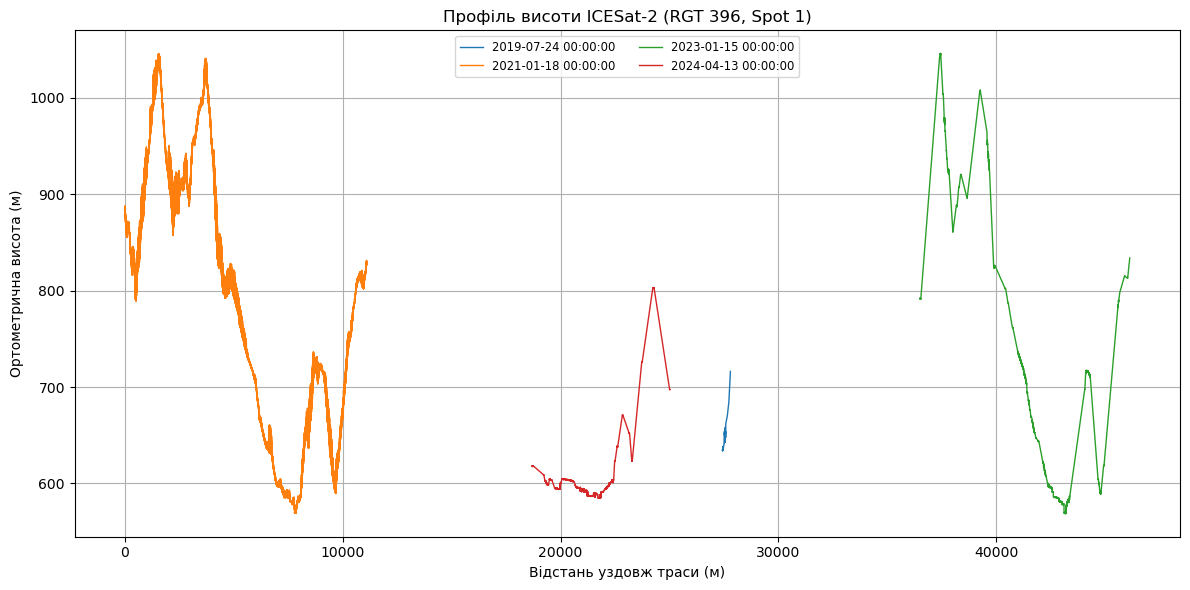

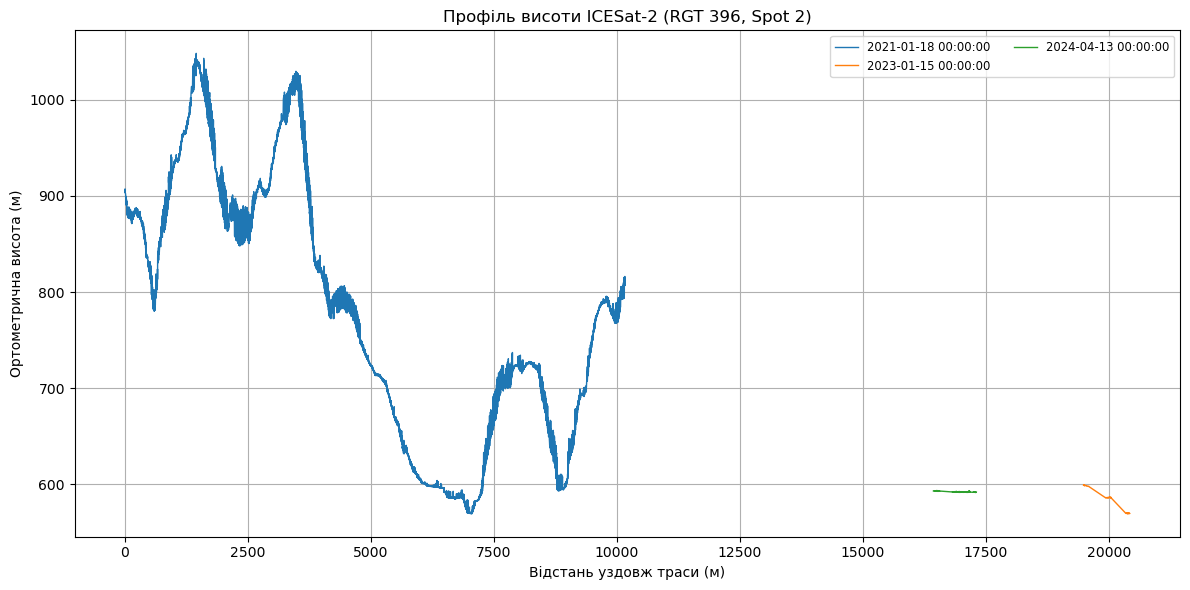

KeyboardInterrupt: 

In [33]:
rgt_396 = ice_gdf[ice_gdf["rgt"] == 396].copy()

# Побудова по кожному spot
for spot_id in sorted(rgt_396["spot"].unique()):
    subset = rgt_396[rgt_396["spot"] == spot_id].copy()

    # Відстань уздовж траси
    subset = subset.to_crs("EPSG:3857")  # метрична система
    line = LineString(subset.geometry.tolist())
    subset["distance_m"] = subset.geometry.apply(lambda p: line.project(p))

    # Графік
    plt.figure(figsize=(12, 6))
    for date, group in subset.groupby(subset.index.floor("D")):
        plt.plot(group["distance_m"], group["orthometric_height"], label=str(date), linewidth=1)

    plt.title(f"Профіль висоти ICESat-2 (RGT 396, Spot {spot_id})")
    plt.xlabel("Відстань уздовж траси (м)")
    plt.ylabel("Ортометрична висота (м)")
    plt.grid(True)
    plt.legend(fontsize='small', ncol=2)
    plt.tight_layout()
    plt.show()



In [34]:

# Припустимо, ice_gdf — твій GeoDataFrame з ICESat-2
filtered = ice_gdf[
    (ice_gdf["rgt"] == 396) &
    (ice_gdf["spot"] == 2) &
    (ice_gdf["atl03_cnf"] == 4) &
    (ice_gdf["quality_ph"] == 0)
].copy()


In [35]:
# Переводимо в метричну систему (напр., ETRS89 / ETRS-LAEA Europe)
filtered = filtered.to_crs(epsg=3035)


In [39]:
from shapely.geometry import LineString

# 1. Відсортувати точки для побудови треку
filtered_sorted = filtered.sort_values("ph_index")
track_line = LineString(filtered_sorted.geometry.tolist())

# 2. Обчислити відстань уздовж треку
filtered["distance_m"] = filtered.geometry.apply(lambda point: track_line.project(point))



In [40]:
print(filtered.head())


                               region  gt  spacecraft_velocity  \
time_ns                                                          
2021-01-18 22:15:10.228352512       2  50          7108.371582   
2021-01-18 22:15:10.228352512       2  50          7108.371582   
2021-01-18 22:15:10.228452352       2  50          7108.371582   
2021-01-18 22:15:10.228552448       2  50          7108.371582   
2021-01-18 22:15:10.228552448       2  50          7108.371582   

                               solar_elevation  rgt  ph_index      height  \
time_ns                                                                     
2021-01-18 22:15:10.228352512       -62.168934  396   1544544  940.362732   
2021-01-18 22:15:10.228352512       -62.168934  396   1544546  940.481140   
2021-01-18 22:15:10.228452352       -62.168934  396   1544547  942.938843   
2021-01-18 22:15:10.228552448       -62.168934  396   1544549  942.866394   
2021-01-18 22:15:10.228552448       -62.168934  396   1544551  940.362366  

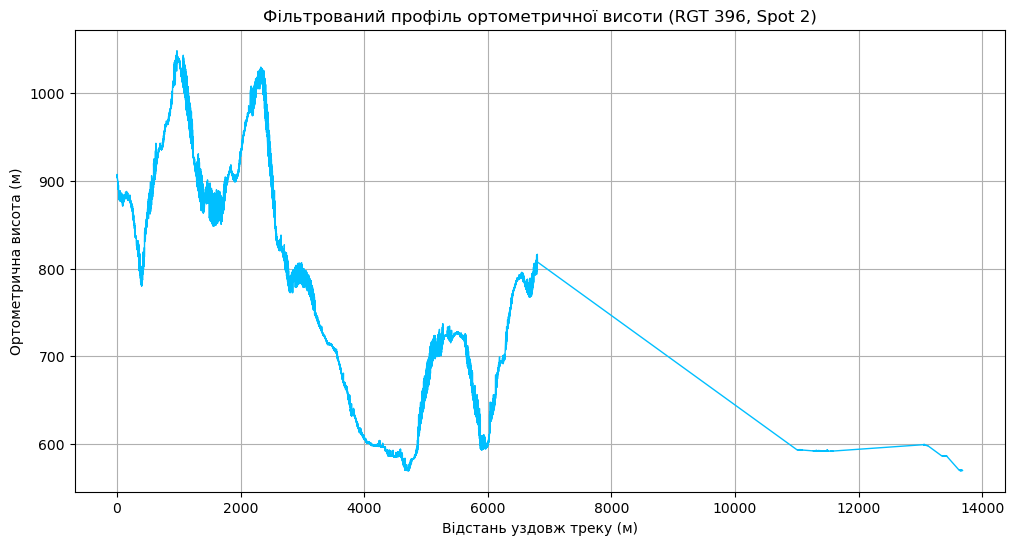

In [41]:
plt.figure(figsize=(12,6))
plt.plot(filtered["distance_m"], filtered["orthometric_height"], color="deepskyblue", linewidth=1)
plt.title("Фільтрований профіль ортометричної висоти (RGT 396, Spot 2)")
plt.xlabel("Відстань уздовж треку (м)")
plt.ylabel("Ортометрична висота (м)")
plt.grid(True)
plt.show()

In [43]:
print(ice_gdf.head())


                               region  gt  spacecraft_velocity  \
time_ns                                                          
2019-03-03 19:21:21.424650752       6  50          7108.268555   
2019-03-03 19:21:21.424750592       6  50          7108.268555   
2019-03-03 19:21:21.425250560       6  50          7108.268555   
2019-03-03 19:21:21.425750528       6  50          7108.268555   
2019-03-03 19:21:21.426050560       6  50          7108.268555   

                               solar_elevation  rgt  ph_index      height  \
time_ns                                                                     
2019-03-03 19:21:21.424650752       -32.253899  998    123498  646.714050   
2019-03-03 19:21:21.424750592       -32.253899  998    123499  650.420288   
2019-03-03 19:21:21.425250560       -32.253899  998    123500  647.244324   
2019-03-03 19:21:21.425750528       -32.253899  998    123503  647.487122   
2019-03-03 19:21:21.426050560       -32.253899  998    123504  644.189331  

                               region  gt  spacecraft_velocity  \
time_ns                                                          
2019-03-03 19:21:21.424650752       6  50          7108.268555   
2019-03-03 19:21:21.424750592       6  50          7108.268555   
2019-03-03 19:21:21.425250560       6  50          7108.268555   
2019-03-03 19:21:21.425750528       6  50          7108.268555   
2019-03-03 19:21:21.426050560       6  50          7108.268555   

                               solar_elevation  rgt  ph_index      height  \
time_ns                                                                     
2019-03-03 19:21:21.424650752       -32.253899  998    123498  646.714050   
2019-03-03 19:21:21.424750592       -32.253899  998    123499  650.420288   
2019-03-03 19:21:21.425250560       -32.253899  998    123500  647.244324   
2019-03-03 19:21:21.425750528       -32.253899  998    123503  647.487122   
2019-03-03 19:21:21.426050560       -32.253899  998    123504  644.189331  

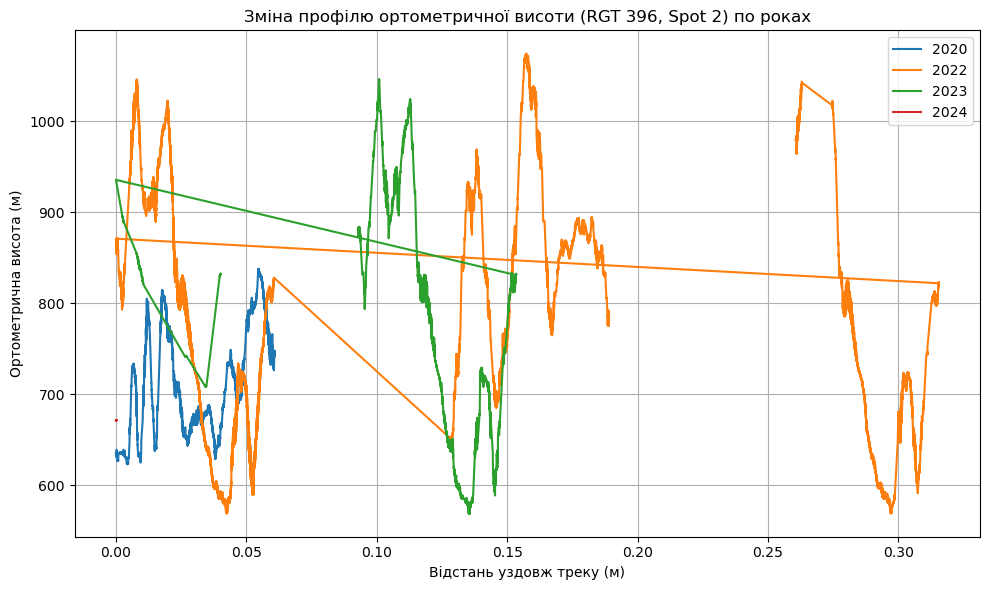

In [51]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString
print(ice_gdf.head())
# Витягуємо рік з індексу (DatetimeIndex)
ice_gdf['year'] = ice_gdf.index.year

# Збираємо всі унікальні роки
years = sorted(ice_gdf['year'].unique())

# Створюємо графік
plt.figure(figsize=(10, 6))

for y in years:
    print(y)
    # Фільтрація за роком, треком, спотом і якістю
    year_data = ice_gdf[
        (ice_gdf['rgt'] == 396) &
        (ice_gdf['spot'] == 6) &
        (ice_gdf['year'] == y) &
        (ice_gdf["atl03_cnf"] >= 3) &  # М'якше: більше довіри
        # (ice_gdf["quality_ph"] == 1)
        (ice_gdf["atl08_class"].isin([1, 2, 3]))
    ].copy()

    # Якщо нема даних — пропускаємо
    if len(year_data) == 0:
        print(f"❌ {y}: немає якісних даних")
        continue
    else:
        print(f"✅ {y}: {len(year_data)} точок")

    # Побудова лінії треку
    year_data_sorted = year_data.sort_values("ph_index")
    track_line = LineString(year_data_sorted.geometry.tolist())

    # Відстань уздовж треку
    year_data["distance_m"] = year_data.geometry.apply(lambda pt: track_line.project(pt))

    # Побудова графіка
    plt.plot(
        year_data["distance_m"],
        year_data["orthometric_height"],
        label=str(y)
    )

plt.title("Зміна профілю ортометричної висоти (RGT 396, Spot 2) по роках")
plt.xlabel("Відстань уздовж треку (м)")
plt.ylabel("Ортометрична висота (м)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


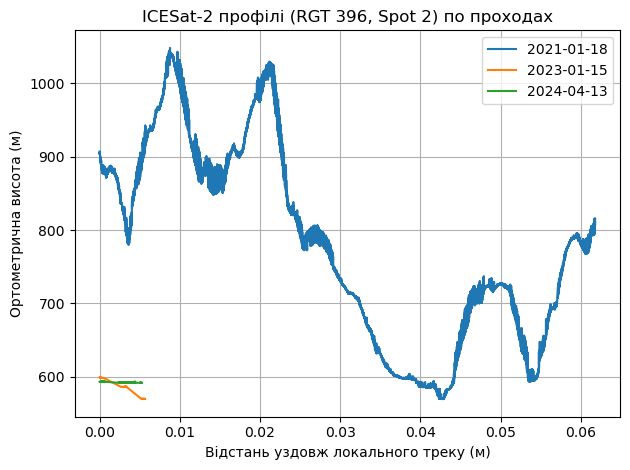

In [53]:
ice_gdf['date'] = ice_gdf.index.date
passes = ice_gdf[
    (ice_gdf['rgt'] == 396) &
    (ice_gdf['spot'] == 2)
]['date'].unique()
for d in sorted(passes):
    pass_data = ice_gdf[
        (ice_gdf['rgt'] == 396) &
        (ice_gdf['spot'] == 2) &
        (ice_gdf['date'] == d) &
        (ice_gdf["atl03_cnf"] == 4) &
        (ice_gdf["atl08_class"].isin([1, 2, 3]))
    ].copy()

    if len(pass_data) == 0:
        continue

    # Побудова локального профілю
    pass_data_sorted = pass_data.sort_values("ph_index")
    track_line = LineString(pass_data_sorted.geometry.tolist())
    pass_data["distance_m"] = pass_data.geometry.apply(lambda pt: track_line.project(pt))

    # Відображення
    plt.plot(
        pass_data["distance_m"],
        pass_data["orthometric_height"],
        label=str(d)
    )

plt.title("ICESat-2 профілі (RGT 396, Spot 2) по проходах")
plt.xlabel("Відстань уздовж локального треку (м)")
plt.ylabel("Ортометрична висота (м)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
for d in sorted(passes):
    subset = ice_gdf[
        (ice_gdf['rgt'] == 396) &
        (ice_gdf['spot'] == 2) &
        (ice_gdf['date'] == d) &
        (ice_gdf["atl03_cnf"] == 4) &
        (ice_gdf["atl08_class"].isin([1, 2, 3]))
    ]
    print(f"{d}: {len(subset)} точок")


2021-01-18: 11449 точок
2023-01-15: 160 точок
2024-04-13: 978 точок


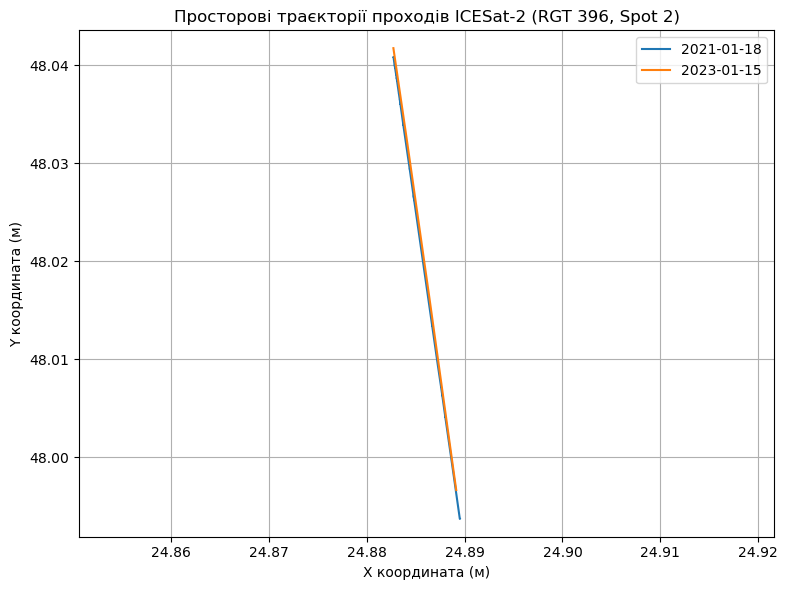

In [56]:
plt.figure(figsize=(8, 6))

for d in sorted(passes):
    sub = ice_gdf[
        (ice_gdf['rgt'] == 396) &
        (ice_gdf['spot'] == 3) &
        (ice_gdf['date'] == d)
    ]
    if len(sub) < 100:
        continue
    x = sub.geometry.x
    y = sub.geometry.y
    plt.plot(x, y, label=str(d))

plt.xlabel("X координата (м)")
plt.ylabel("Y координата (м)")
plt.title("Просторові траєкторії проходів ICESat-2 (RGT 396, Spot 2)")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.tight_layout()
plt.show()


2020-01-21: MAE = 3.24 м, RMSE = 5.00 м
2021-01-18: MAE = 7.40 м, RMSE = 10.81 м
2022-01-17: MAE = 12.45 м, RMSE = 16.13 м
2022-04-18: MAE = 7.11 м, RMSE = 10.23 м
2022-07-17: MAE = 5.46 м, RMSE = 6.85 м
2022-10-16: MAE = 6.57 м, RMSE = 9.28 м
2023-01-15: MAE = 2.58 м, RMSE = 4.73 м
2023-07-16: MAE = 4.13 м, RMSE = 6.46 м
2023-10-14: MAE = 6.62 м, RMSE = 8.97 м
2024-01-13: MAE = 6.82 м, RMSE = 11.15 м


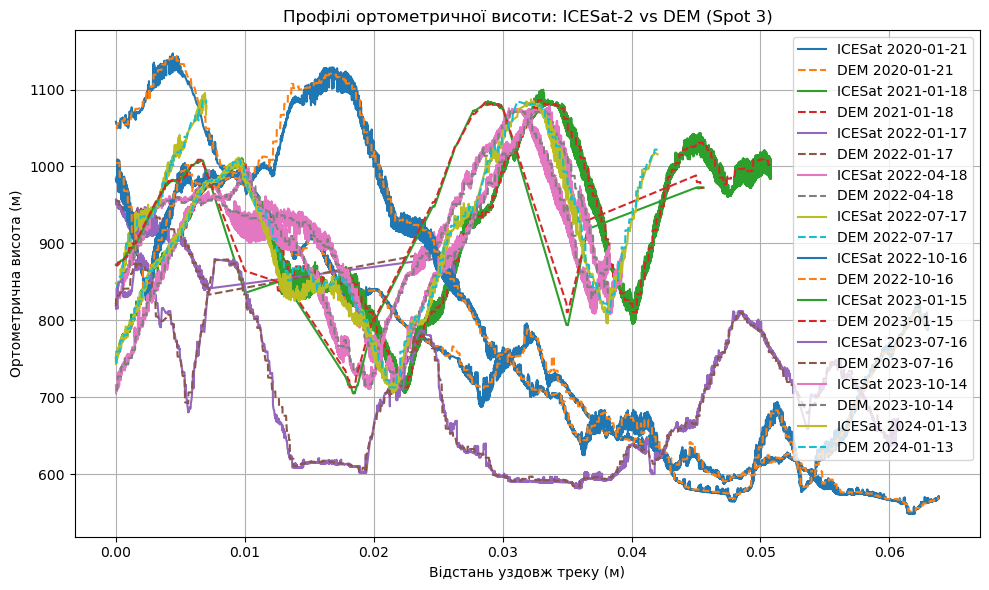

In [63]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import numpy as np

# 1. Фільтрація надійних точок по Spot 3
filtered = ice_gdf[
    (ice_gdf["rgt"] == 396) &
    (ice_gdf["spot"] == 3) &
    (ice_gdf["atl03_cnf"] == 4) &
    (ice_gdf["atl08_class"].isin([1, 2, 3]))
].copy()

# 2. Додати дату
filtered["date"] = filtered.index.date
dates = sorted(filtered["date"].unique())

# 3. Візуалізація та обчислення по кожному проходу
plt.figure(figsize=(10, 6))

for date in dates:
    df = filtered[filtered["date"] == date].copy()
    if df.empty:
        continue

    df_sorted = df.sort_values("ph_index")

    if len(df_sorted) < 5:
        continue  # пропустити надто короткі проходи

    # Лінія треку та обчислення відстані
    line = LineString(df_sorted.geometry.tolist())
    df["distance_m"] = df.geometry.apply(lambda pt: line.project(pt))

    # Обчислення різниці
    df["delta"] = df["dem_height"] - df["orthometric_height"]
    mae = np.mean(np.abs(df["delta"]))
    rmse = np.sqrt(np.mean(df["delta"]**2))
    print(f"{date}: MAE = {mae:.2f} м, RMSE = {rmse:.2f} м")

    # Побудова графіків
    plt.plot(df["distance_m"], df["orthometric_height"], label=f"ICESat {date}")
    plt.plot(df["distance_m"], df["dem_height"], '--', label=f"DEM {date}")

# Оформлення графіка
plt.title("Профілі ортометричної висоти: ICESat-2 vs DEM (Spot 3)")
plt.xlabel("Відстань уздовж треку (м)")
plt.ylabel("Ортометрична висота (м)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


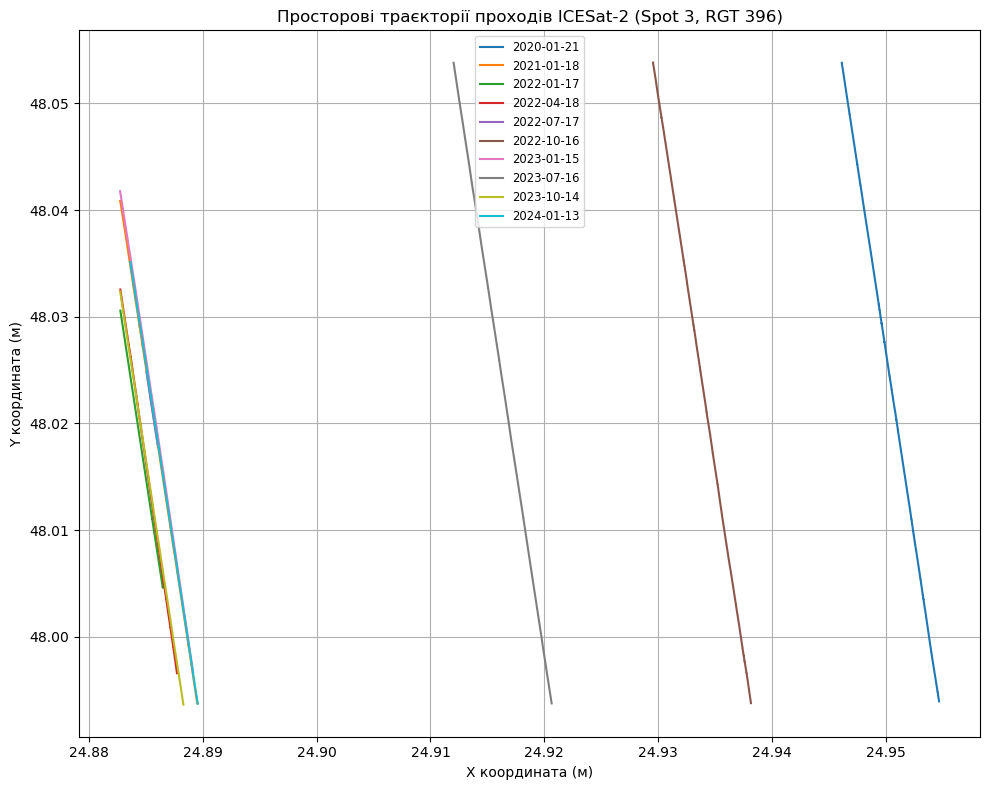

In [64]:
import matplotlib.pyplot as plt

# Упевнись, що в тебе є колонка з датою
filtered['date'] = filtered.index.date
dates = sorted(filtered['date'].unique())

plt.figure(figsize=(10, 8))

for date in dates:
    df = filtered[filtered['date'] == date]

    if len(df) < 100:  # пропустити короткі проходи
        continue

    # Будуємо траєкторію
    x = df.geometry.x
    y = df.geometry.y

    plt.plot(x, y, label=str(date))

plt.title("Просторові траєкторії проходів ICESat-2 (Spot 3, RGT 396)")
plt.xlabel("X координата (м)")
plt.ylabel("Y координата (м)")
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
# Якщо ще не зроблено — перевір поточну систему координат
print(ice_gdf.crs)

# Перепроєктуй до Web Mercator
ice_gdf_3857 = ice_gdf.to_crs(epsg=3857)


{"$schema": "https://proj.org/schemas/v0.7/projjson.schema.json", "type": "GeographicCRS", "name": "WGS 84 longitude-latitude", "datum": {"type": "GeodeticReferenceFrame", "name": "World Geodetic System 1984", "ellipsoid": {"name": "WGS 84", "semi_major_axis": 6378137, "inverse_flattening": 298.257223563}}, "coordinate_system": {"subtype": "ellipsoidal", "axis": [{"name": "Geodetic longitude", "abbreviation": "Lon", "direction": "east", "unit": "degree"}, {"name": "Geodetic latitude", "abbreviation": "Lat", "direction": "north", "unit": "degree"}]}, "id": {"authority": "OGC", "code": "CRS84"}}


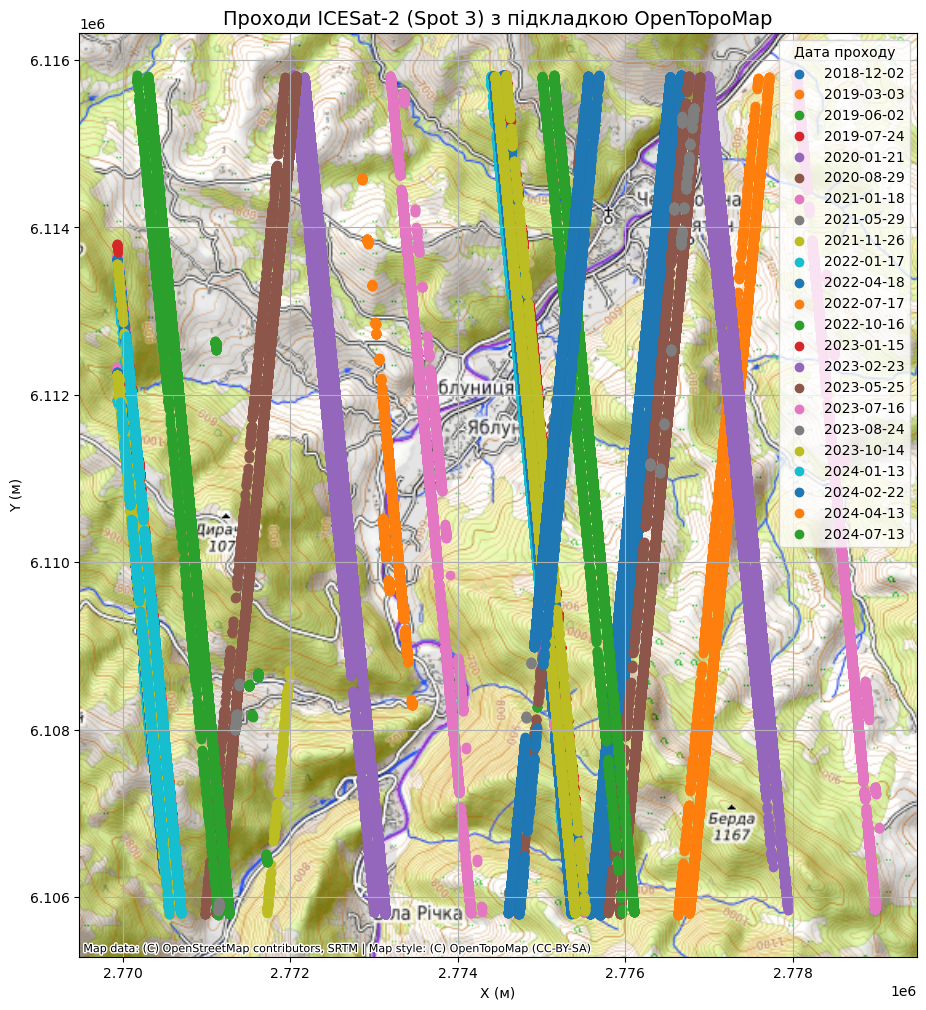

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# 1. Перепроєктуй GeoDataFrame до Web Mercator
ice_gdf_3857 = ice_gdf.to_crs(epsg=3857)

# 2. Групуй по датах (припускаємо, що 'date' вже є колонкою)
fig, ax = plt.subplots(figsize=(12, 12))

for date, group in ice_gdf_3857.groupby('date'):
    group.plot(ax=ax, label=str(date), linewidth=1)

# 3. Додай OpenTopoMap
ctx.add_basemap(ax, source=ctx.providers.OpenTopoMap)

# 4. Оформлення
ax.set_title("Проходи ICESat-2 (Spot 3) з підкладкою OpenTopoMap", fontsize=14)
ax.legend(title="Дата проходу")
plt.xlabel("X (м)")
plt.ylabel("Y (м)")
plt.grid(True)
plt.show()


In [67]:
min_points = 1000
good_dates = filtered.groupby('date').filter(lambda x: len(x) > min_points)['date'].unique()


In [69]:
results = []

for date in dates:
    df = filtered[filtered['date'] == date].copy()

    if df.empty:
        continue

    # Сортування та обчислення дистанції вздовж треку
    df_sorted = df.sort_values("ph_index")
    line = LineString(df_sorted.geometry.tolist())
    df["distance_m"] = df.geometry.apply(lambda pt: line.project(pt))

    # Різниця DEM - ICESat
    df["delta"] = df["dem_height"] - df["orthometric_height"]

    # Статистика
    mae = np.mean(np.abs(df["delta"]))
    rmse = np.sqrt(np.mean(df["delta"]**2))
    results.append((str(date), len(df), mae, rmse))

# Сортуємо за RMSE
sorted_results = sorted(results, key=lambda x: x[3])  # сортування за RMSE

# Виводимо топ 5
for date, n, mae, rmse in sorted_results[:5]:
    print(f"{date}: {n} точок | MAE = {mae:.2f} м | RMSE = {rmse:.2f} м")



2023-01-15: 1090 точок | MAE = 2.58 м | RMSE = 4.73 м
2020-01-21: 26333 точок | MAE = 3.24 м | RMSE = 5.00 м
2023-07-16: 6983 точок | MAE = 4.13 м | RMSE = 6.46 м
2022-07-17: 649 точок | MAE = 5.46 м | RMSE = 6.85 м
2023-10-14: 4907 точок | MAE = 6.62 м | RMSE = 8.97 м


In [86]:
for date, n, mae, rmse in sorted_results[:10]:
    print(f"{date}: {n} точок | MAE = {mae:.2f} м | RMSE = {rmse:.2f} м")

2023-01-15: 1090 точок | MAE = 2.58 м | RMSE = 4.73 м
2020-01-21: 26333 точок | MAE = 3.24 м | RMSE = 5.00 м
2023-07-16: 6983 точок | MAE = 4.13 м | RMSE = 6.46 м
2022-07-17: 649 точок | MAE = 5.46 м | RMSE = 6.85 м
2023-10-14: 4907 точок | MAE = 6.62 м | RMSE = 8.97 м
2022-10-16: 8737 точок | MAE = 6.57 м | RMSE = 9.28 м
2022-04-18: 11769 точок | MAE = 7.11 м | RMSE = 10.23 м
2021-01-18: 26599 точок | MAE = 7.40 м | RMSE = 10.81 м
2024-01-13: 5134 точок | MAE = 6.82 м | RMSE = 11.15 м
2022-01-17: 2041 точок | MAE = 12.45 м | RMSE = 16.13 м


In [87]:
import numpy as np

# sorted_results має вигляд: [(date, n_points, mae, rmse), ...]
mae_values = [mae for _, _, mae, _ in sorted_results]
rmse_values = [rmse for _, _, _, rmse in sorted_results]
n_values = [n for _, n, _, _ in sorted_results]

# Зважені середні (за кількістю точок)
weighted_mae = np.average(mae_values, weights=n_values)
weighted_rmse = np.sqrt(np.average([r**2 for r in rmse_values], weights=n_values))

# Просте середнє (арифметичне)
mean_mae = np.mean(mae_values)
mean_rmse = np.mean(rmse_values)

print(f"Середнє MAE (арифметичне): {mean_mae:.2f} м")
print(f"Середнє RMSE (арифметичне): {mean_rmse:.2f} м")
print(f"Зважене MAE (за точками): {weighted_mae:.2f} м")
print(f"Зважене RMSE (за точками): {weighted_rmse:.2f} м")


Середнє MAE (арифметичне): 6.24 м
Середнє RMSE (арифметичне): 8.96 м
Зважене MAE (за точками): 5.85 м
Зважене RMSE (за точками): 9.02 м


In [1]:
top_dates = ["2025-05-07"]

for date in top_dates:
    date_obj = pd.to_datetime(date).date()
    df = filtered[filtered['date'] == date_obj].copy()

    if df.empty:
        continue

    df_sorted = df.sort_values("ph_index")
    line = LineString(df_sorted.geometry.tolist())
    df["distance_m"] = df.geometry.apply(lambda pt: line.project(pt))

    plt.plot(df["distance_m"], df["orthometric_height"], label=f"ICESat {date}")
    plt.plot(df["distance_m"], df["dem_height"], '--', label=f"DEM {date}")

plt.title("Профіля ортометричної висоти EVRF 2007: ICESat-2 vs DEM TanDEM-X")
plt.xlabel("Відстань уздовж треку (м)")
plt.ylabel("Висота (м)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'pd' is not defined

In [82]:


def plot_profiles(
    df,
    group_column='date',
    title=None,
    figsize=(10, 6),
    dem_label="DEM",
    color_map_name='tab10',
    language="uk",  # "uk", "en", or "both"
    dem_name="DEM",
    save_path=None
):
    """
    Побудова порівняльних профілів ортометричних висот (ICESat-2 vs DEM) з автоматичним кольором.

    Parameters:
        df : pd.DataFrame
            Дані, які мають колонки: geometry, ph_index, orthometric_height, dem_height, group_column.
        group_column : str
            Колонка для групування (наприклад, 'date' або 'track_id').
        title : str
            Назва графіка.
        figsize : tuple
            Розмір графіка (default (10, 6)).
        dem_label : str
            Текст для підпису DEM у легенді (відображається один раз).
        color_map_name : str
            Назва палітри matplotlib (наприклад, 'tab10', 'Set1', 'Dark2', 'viridis').
        language : str
            Мова: "uk", "en" або "both".
        dem_name : str
            Назва DEM (TanDEM-X, FABDEM тощо), буде в заголовку.
        save_path : str
            Шлях для збереження графіка (наприклад, "output.png"). Якщо None — графік лише показується.
    """

    unique_groups = sorted(df[group_column].dropna().unique())
    cmap = plt.get_cmap(color_map_name)
    color_map = {group: cmap(i % cmap.N) for i, group in enumerate(unique_groups)}

    plt.style.use('default')  # білий фон
    plt.figure(figsize=figsize)

    dem_plotted = False

    for group in unique_groups:
        df_group = df[df[group_column] == group].copy()
        if df_group.empty:
            continue

        df_sorted = df_group.sort_values("ph_index")
        line = LineString(df_sorted.geometry.tolist())
        df_sorted["distance_m"] = df_sorted.geometry.apply(lambda pt: line.project(pt))

        plt.plot(df_sorted["distance_m"], df_sorted["orthometric_height"],
                 label=f"ICESat-2 {group}",
                 color=color_map[group],
                 linewidth=2)

        # DEM — один раз у легенді
        dem_legend = dem_label if not dem_plotted else "_nolegend_"
        plt.plot(df_sorted["distance_m"], df_sorted["dem_height"],
                 label=dem_legend,
                 color='gray',
                 linestyle='--',
                 linewidth=1.5)
        dem_plotted = True

    # Динамічна назва
    if not title:
        if language == "uk":
            title = f"Порівняння ортометричних висот ICESat-2 і DEM ({dem_name}) у системі EVRF2007"
            ylabel = "Ортометрична висота (м н.р.м.)"
            xlabel = "Відстань уздовж треку (м)"
        elif language == "en":
            title = f"Comparison of orthometric heights from ICESat-2 and {dem_name} DEM in the EVRF2007 system"
            ylabel = "Orthometric height (m a.s.l.)"
            xlabel = "Distance along track (m)"
        elif language == "both":
            title = f"Порівняння ортометричних висот (EVRF2007)\nComparison of orthometric heights from ICESat-2 and {dem_name} DEM"
            ylabel = "Ортометрична висота (м н.р.м.) / Orthometric height (m a.s.l.)"
            xlabel = "Відстань уздовж треку (м) / Distance along track (m)"
        else:
            title = "Orthometric height profiles"
            ylabel = "Height (m)"
            xlabel = "Distance (m)"

    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

    # Впорядкування легенди: DEM завжди останній
    handles, labels = plt.gca().get_legend_handles_labels()
    dem_entries = [(h, l) for h, l in zip(handles, labels) if l == dem_label]
    other_entries = [(h, l) for h, l in zip(handles, labels) if l != dem_label]
    sorted_handles, sorted_labels = zip(*(other_entries + dem_entries))
    plt.legend(sorted_handles, sorted_labels,
               loc='center left', bbox_to_anchor=(1, 0.5),
               fontsize=10, frameon=False)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.show()



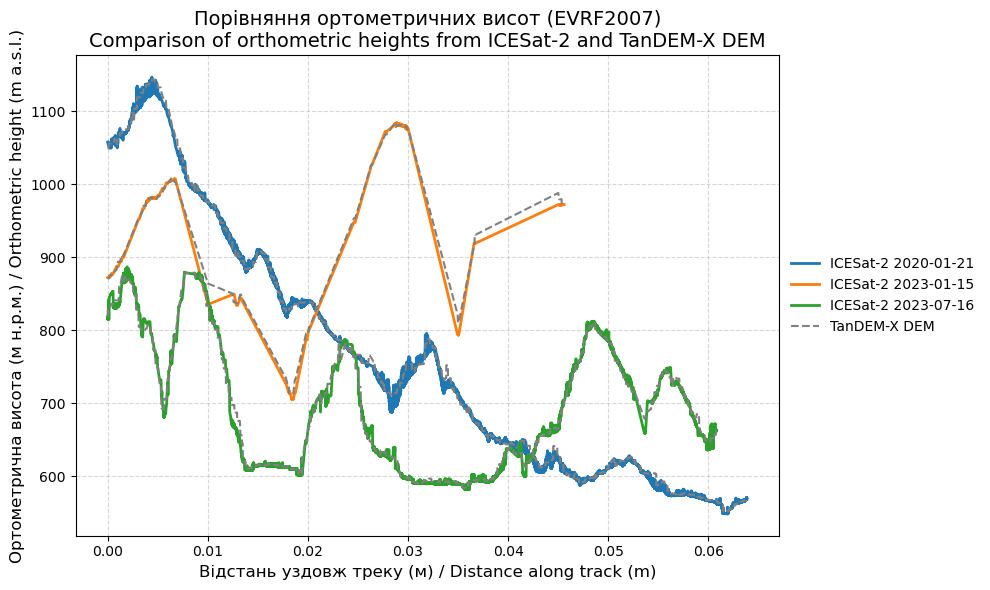

In [84]:
top_dates = ["2023-01-15", "2020-01-21", "2023-07-16"]
top_dates_dt = [pd.to_datetime(d).date() for d in top_dates]
filtered_subset = filtered[filtered["date"].isin(top_dates_dt)]

plot_profiles(
    df=filtered_subset,
    dem_label="TanDEM-X DEM",
    dem_name="TanDEM-X",
    language="both",  # "uk", "en", або "both"
    save_path="output/icesat_vs_tandem_bilingual.png"
)



In [42]:
import numpy as np

# Похибка: DEM - ICESat
ice_gdf["error"] = ice_gdf["dem_height"] - ice_gdf["orthometric_height"]

# Видаляємо NaN
errors = ice_gdf["error"].dropna()

# Статистика
rmse = np.sqrt(np.mean(errors**2))
bias = np.mean(errors)
std = np.std(errors)
iqr = np.percentile(errors, 75) - np.percentile(errors, 25)

print(f"📊 RMSE: {rmse:.2f} м")
print(f"📊 Середня похибка (Bias): {bias:.2f} м")
print(f"📊 Стандартне відхилення: {std:.2f} м")
print(f"📊 IQR (міжквартильний розмах): {iqr:.2f} м")


📊 RMSE: 9.21 м
📊 Середня похибка (Bias): 3.42 м
📊 Стандартне відхилення: 8.55 м
📊 IQR (міжквартильний розмах): 6.34 м


In [88]:
import matplotlib.pyplot as plt

plt.hist(errors, bins=50, edgecolor='black', color='gray')
plt.title("Розподіл похибок DEM - ICESat (ортометричні)")
plt.xlabel("Похибка (м)")
plt.ylabel("Кількість точок")
plt.grid(True)
plt.show()


NameError: name 'errors' is not defined

In [44]:
gdf_profile = ice_gdf.dropna(subset=["orthometric_height", "dem_height"]).copy()

# Переводимо геометрію в ETRS-LAEA (для аналізу по Європі)
gdf_profile = gdf_profile.to_crs("EPSG:3035")


In [45]:
import numpy as np

# Витягуємо координати
gdf_profile["x"] = gdf_profile.geometry.x
gdf_profile["y"] = gdf_profile.geometry.y

# Обчислюємо наростаючу відстань між точками (крокова сума)
gdf_profile = gdf_profile.sort_values(by=["x", "y"])  # або по часу, якщо є
coords = gdf_profile[["x", "y"]].values
distances = np.linalg.norm(np.diff(coords, axis=0), axis=1)
distances = np.insert(np.cumsum(distances), 0, 0)  # починаємо з 0

gdf_profile["distance_m"] = distances


In [47]:
# Лінія з усіх точок — траєкторія супутника
from shapely.geometry import LineString

track_line = LineString(gdf_profile.geometry.tolist())

